# Pandas Tutorial Information

* Awesome pandas tutorials already exist here: http://pandas.pydata.org/pandas-docs/stable/tutorials.html

In [2]:
import pandas as pd
#because data have mixed types, we have to use low_memory=False to avoid getting a DtypeWarning
df = pd.read_csv('AdvancedPandasTutorial.csv',low_memory=False)

In [12]:
import matplotlib
%matplotlib inline

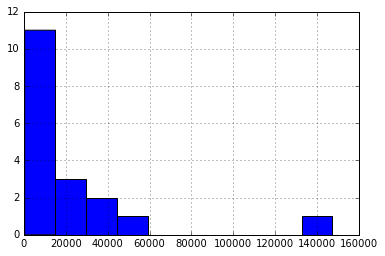

In [15]:
df.verb.value_counts().hist()

In [2]:
df.columns

Index([u'answer_given', u'assessment', u'completed', u'confidence_level',
       u'correct', u'duration', u'email', u'launch_referrer', u'name',
       u'navigation_method', u'newTime', u'object', u'objectid', u'oldTime',
       u'playRate', u'playerTime', u'question_type', u'score', u'timestamp',
       u'verb', u'videoID', u'videoName', u'volume'],
      dtype='object')

### Column descriptions
* answer_given is the actual answer provided by the student on a quiz
* assessment is the quizID
* completed is True when the quiz was submitted successfully
* confidence_level is the confidence in answer as 0, 1, 2 (2 being confident)
* correct is whether the answer attempt was correct
* duration is the time it took the student to take the quiz
* email is the students email replaced by a studentID
* launch_referrer does not contain information
* name is the student name replaced by a studentID (same as email)
* navigation_method is for attempted verbs and contains information regarding how a 
   * student moved through the quiz, next, previous, etc.
* newTime is for jumped video events and is the time in the video where students jump to
* oldTime is for jumped video events and is the time in the video where students jump from
* object is the name of the object the student is interacting with (quiz question, video, etc)
* objectID is the ID for the object
* score is the students score on a quiz
* timestamp is when the event occurred
* verb is the action that was taken by the student
* videoID is a unique video identifier
* volume is the volume level changed to by a student in a video
* playRate is the rate of playback changed to by a student in a video

### Verb Definitions
* watched: every 10 seconds a student is watching a video at each video time divisible by 10 (10s, 20s, etc.)
* answered: answers a question
* attempted: navigates between questions
* played: clicks play in a video
* suspended: goes to a different tab when taking a quiz
* paused: clicks pause in a video 
* jumped: scrubs, or skips forward or backward in a video
* started: starts a video
* ended: ends a video
* launched: starts a quiz
* completed: finishes a quiz
* showed_answer: clicked show answer to see the answer
* changed_playrate: changed the playrate of the video
* clicked: clicked in the student dashboard
* showed_hint: clicked show hint to see a hint
* minimized: minized the video after maximizing it
* changed_volume: changed the volume of the video
* exited: not a real event anymore

### Question 1
What percentage of total events happened between October 1st 2015 and November 1st 2015?

In [3]:
df.timestamp = pd.to_datetime(df.timestamp)

In [4]:
start = pd.to_datetime('10/1/2015')
end = pd.to_datetime('11/1/2015')

In [5]:
df[(df.timestamp < end)&(df.timestamp > start)].count()['email'] / float(df.count()['email']), 'answer'

(0.33710331108130981, 'answer')

### Question 2
Print out a list of the number of total click events for every student in the data set

In [6]:
df.groupby('name').count()['email']

name
0      4312
1      4608
2      4183
3      7270
4      1262
5         4
6      1677
7      4137
8      4125
9         3
10     6498
11     1808
12        3
13     3790
14     3260
15     3921
16     2842
17     5157
18     2888
19     4997
20     2560
21     3125
22     3724
23     4483
24     2739
25     5642
26        4
27     2314
28     1314
29     1905
       ... 
198    6350
199    1100
200    1421
201     212
202     530
203     686
204    1293
205    1743
206     550
207    1193
208     539
209     538
210     971
211    1480
212    1387
213     160
214    1285
215     340
216    2911
217    1118
218     165
219    1686
220    1386
221     838
222     978
223     651
224     966
225    1175
226    1006
227    2198
Name: email, dtype: int64

### Question 3
Use a list within a groupby function groupby(['item 1','item 2']) to figure out how many people got an answer correct and incorrect with a confidence level of 2, 1, and 0. Don't forget to specify the function to use

In [7]:
df.groupby(['correct','confidence_level']).count()['email'], 'answer'

(correct  confidence_level
 False    high                 7292
          low                  5159
          medium              11865
 True     high                15849
          low                  2638
          medium              13408
 Name: email, dtype: int64, 'answer')

### Question 4
* Select only the jumped events in the data set
* Of these events, how many are forward, how many are backward, and how many jump to the same spot?

In [8]:
temp = df[df.verb == 'jumped'].copy()
temp['time_difference'] = temp['oldTime'] - temp['newTime']

In [9]:
temp[temp.time_difference > 0].count()['email'], 'backwards'

(8364, 'backwards')

In [10]:
temp[temp.time_difference < 0].count()['email'], 'forwards'

(6958, 'forwards')

In [11]:
temp[temp.time_difference == 0].count()['email'], 'stayed the same'

(160, 'stayed the same')

### Question 5
* Plot a histogram of all quiz scores. Plot it with 50 bins. Change the color to red.
* Don't forget to add this to your code:
  * import matplotlib
  * %matplotlib inline
* See matplotlib documentation if you need it here
  * http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

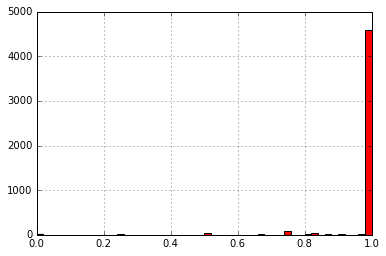

In [12]:
import matplotlib
%matplotlib inline
df.score.hist(bins=50,color='red')

### Question 6
* Plot the confidence_level across all students in a bar chart.
* Make sure the bars are in order, low, medium, high
* Change the colors so each bar is a different color

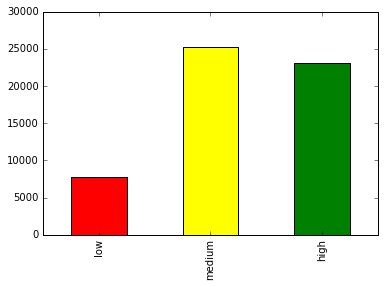

In [13]:
df.confidence_level.value_counts()[['low','medium','high']].plot(kind='bar',color=['red','yellow','green'])

### Question 7
How many suspended events did students 40, 50, and 60 have combined across the whole semester?

In [14]:
df[(df.name == 40)|(df.name == 50)|(df.name == 60)&(df.verb == 'suspended')].count()['email'], 'combined suspended events'

(4680, 'combined suspended events')

### Question 8
* Return a list of the number of verb events within each specific quiz
* Use either the object or objectid column to find an assessment identifier

In [15]:
df['assessmentIDnoNAN'] = df['object'].map(lambda x: x if str(x).find('assessment') > -1 else '')

In [16]:
df['assessmentID'] = df.assessmentIDnoNAN.map(lambda x: x.split(' ')[-1] if x.find('assessment') > -1 else '')

In [17]:
#final answer
df[df.assessmentID != ''].groupby(['assessmentID','verb']).count()['email']

assessmentID  verb         
100           answered         1116
              attempted         991
              showed_answer     202
              showed_hint       119
              suspended         438
101           answered         1065
              attempted         512
              showed_answer     349
              showed_hint       170
              suspended         555
102           answered          504
              attempted         172
              showed_answer     106
              showed_hint        88
              suspended         222
103           answered          812
              attempted         450
              showed_answer      87
              showed_hint        43
              suspended         191
104           answered          718
              attempted         314
              showed_answer     122
              showed_hint        82
              suspended         184
105           answered         1021
              attempted         491


### Question 9
Return a list of student average quiz scores. Each value should be an average quiz score for a particular student

In [18]:
df.groupby(['name']).mean()['score'], 'answer'

(name
 0      0.986111
 1      0.987626
 2      1.000000
 3      0.995902
 4      1.000000
 5           NaN
 6      1.000000
 7      0.970588
 8      0.988636
 9           NaN
 10     0.984375
 11     0.988194
 12          NaN
 13     1.000000
 14     0.986842
 15     0.952160
 16     0.835256
 17     0.991935
 18     0.990385
 19     0.982000
 20     0.953704
 21     0.995098
 22     0.981481
 23     1.000000
 24     1.000000
 25     0.977642
 26          NaN
 27     0.998485
 28     1.000000
 29     1.000000
          ...   
 198    0.980769
 199    0.986979
 200    0.988095
 201    0.944444
 202    0.987500
 203    0.935185
 204    0.969697
 205    0.990741
 206    0.925000
 207    0.983871
 208    0.939815
 209    0.953125
 210    0.968750
 211    0.968750
 212    0.975000
 213    0.950000
 214    0.996667
 215    1.000000
 216    0.989796
 217    1.000000
 218    0.982143
 219    1.000000
 220    0.989474
 221    0.992647
 222    0.863699
 223    1.000000
 224    1.000000
 225    

### Question 10
* Create a plot using this data set.
* The plot must be labelled
* Colors must be changed
* The type of plot must be specified
* Provide a paragraph explanation of the plot

In [ ]:
df['month'] = df.timestamp.apply(lambda x: (x.month - 1) * 30.25)
df['day'] = df.timestamp.apply(lambda x: x.day)
df['month_day'] = df.month + df.day

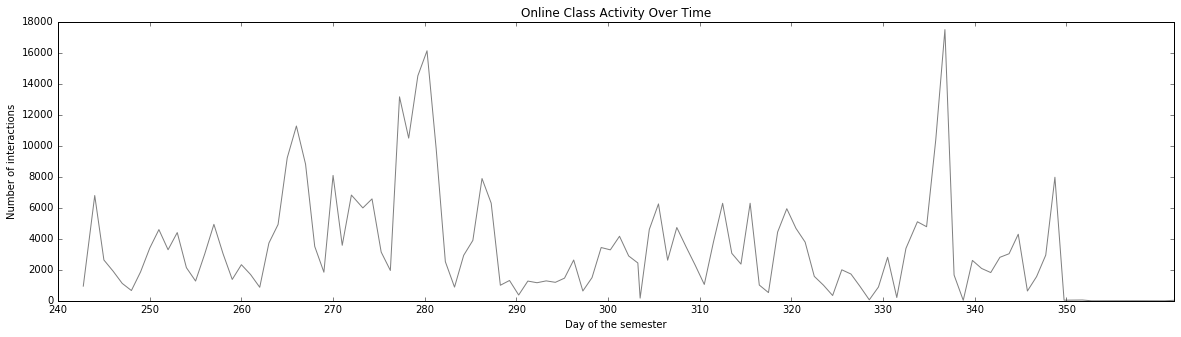

In [56]:
plot_title = 'Online Class Activity Over Time'
plot_xticks = range(240,360,10)
ax = df.month_day[df.month_day > 150].value_counts().sort_index().plot(kind='line',title=plot_title, xticks=plot_xticks,figsize=(20,5),color='gray')
ax.set_xlabel('Day of the semester')
ax.set_ylabel('Number of interactions')

This plot groups student activity into day increments and then plots them as a line plot across all days in the semester. The max was right before Exam 3 with almost 18000 interactions occurring that day. The second highest max was right before Exam 1 with just over 16000 interactions occurring that day. There seems to be a lull after each exam period. This makes sense because students will study for an exam, and once the exam is over, they will take a break from the class for a little bit as they usually didn't have to do anything immediately after an exam.